<a href="https://colab.research.google.com/github/AnLiMan/CNN-for-audio-recognition/blob/main/Emergency_vehicle_siren_sounds_v_0_5_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Настройки сети

In [ ]:
number_of_interations = 3
print('Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака: ', number_of_interations)

Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака:  3


#Библиотеки



In [ ]:
!pip install AudioSegment
!pip install -q pyyaml h5py  # Требуется для сохранения модели в формате HDF5

import zipfile
import os
from google.colab import drive
import IPython
import numpy as np
import matplotlib.pyplot as plt 
import time
from pydub import AudioSegment
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import shutil

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from __future__ import absolute_import, division, print_function, unicode_literals

     |████████████████████████████████| 66 kB 2.6 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72393 sha256=699f4a940d67b1ac9ed000ef0ec4ee32a398c2f281a79d0debb862fcace89455
  Stored in directory: /root/.cache/pip/wheels/11/f9/67/a3158d131f57e1c0a7d8d966a707d4a2fb27567a4fe47723ad
Successfully built webrtcvad


#Подключение гугл диска и загрузка данных

In [ ]:
drive.mount('/content/drive')
zip_file1 = '/content/drive/My Drive/Files for colab//CNN for audio/EVS3.zip'
z1 = zipfile.ZipFile(zip_file1, 'r')
z1.extractall()
print(os.listdir)

Mounted at /content/drive
<built-in function listdir>


##Проверим файлы

Аудио скорой помощи

In [ ]:
media_path1 = "Sounds/train/ambulance/sound_1.wav"
print('ambulance')
IPython.display.Audio(media_path1)

ambulance


Спектрограмма

Text(0.5, 1.0, 'ambulance')

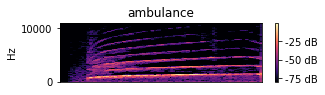

In [ ]:
data, sampling_rate = librosa.load(media_path1)
plt.figure(figsize=(10, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("ambulance")

Аудио пожарной машины

In [ ]:
media_path2 = "Sounds//train/firetruck/sound_201.wav"
print('firetruck')
IPython.display.Audio(media_path2)

firetruck


Спектрограмма

Text(0.5, 1.0, 'firetruck')

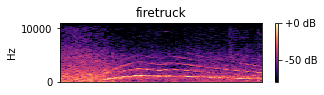

In [ ]:
data, sampling_rate = librosa.load(media_path2)
plt.figure(figsize=(10, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("firetruck")

Аудио гороского трафика

In [ ]:
media_path3 = "Sounds/train/traffic/sound_401.wav"
print('traffic')
IPython.display.Audio(media_path3)

traffic


Спектрограмма

Text(0.5, 1.0, 'Traffic')

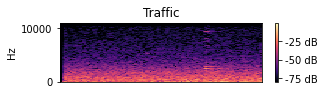

In [ ]:
data, sampling_rate = librosa.load(media_path3)
plt.figure(figsize=(10, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Traffic")

Пример сохранения спектрограммы

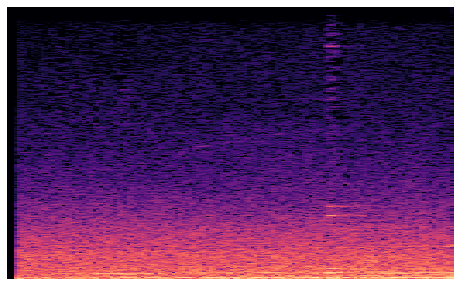

In [ ]:
data, samplrate = librosa.load(media_path3)
plt.figure(figsize=(8,5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.axis('off')
librosa.display.specshow(D)
plt.savefig('traffic_spec.png', bbox_inches = 'tight', pad_inches=0)

#Подготовка загруженных данных

##Переведём все аудиофайлы в спектрограммы 

##Функция создания спектрограмм

In [ ]:
def CreateSpectrogramm (min_range, max_range, input_folder_path, output_folder_path):
  for i in range (min_range, max_range):
  folder_media_path = folder_path + str (i)  + ".wav"
  data, samplrate = librosa.load(input_folder_path)
  plt.figure(figsize=(8,5))
  D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref = np.max)
  plt.axis('off')
  librosa.display.specshow(D)
  plt.savefig(output_folder_path + str (i) + '.png', bbox_inches = 'tight', pad_inches = 0)

##Создание спектрограмм тестовой и тренировочной выборок аудиофайлов

In [ ]:
# Создание пустых каталогов, в которых будут сохраняться спектрограммы
try:
  os.mkdir("Spectrograms/train/ambulance") 
  os.mkdir("Spectrograms/train/firetruck") 
  os.mkdir("Spectrograms/train/traffic") 
  os.mkdir("Spectrograms/test/ambulance") 
  os.mkdir("Spectrograms/test/firetruck") 
  os.mkdir("Spectrograms/test/traffic") 
except:
    print("\nВсе уже есть в каталоге. Вам не нужно запускать эту ячейку")

#Создадим спектрограммы сирены скорой помощи тренировочной выборки
CreateSpectrogramm (1, 180, "Sounds/train/ambulance/sound_", 'Spectrograms/train/ambulance/ambulance_spec')

#Создадим спектрограммы сирены скорой помощи тестовой выборки
CreateSpectrogramm (181, 200, "Sounds/test/ambulance/sound_", 'Spectrograms/test/ambulance/ambulance_spec')

#Создадим спектрограммы сирены пожарной машины тренировочной выборки
CreateSpectrogramm (201, 380, "Sounds/train/firetruck/sound_", 'Spectrograms/train/firetruck/firetruck_spec')

#Создадим спектрограммы сирены пожарной машины тестовой выборки
CreateSpectrogramm (381, 400, "Sounds/test/firetruck/sound_", 'Spectrograms/test/firetruck/firetruck_spec')

#Создадим спектрограммы городского трафика тренировочной выборки
CreateSpectrogramm (401, 580, "Sounds/train/traffic/sound_", 'Spectrograms/train/traffic/traffic_spec')

#Создадим спектрограммы городского трафика тестовой выборки
CreateSpectrogramm (581, 600, "Sounds/test/traffic/sound_", 'Spectrograms/test/traffic/traffic_spec')

##Загрузим спектрограммы для дальнейшей обработки

In [ ]:
#перед этим создайте папку с данными train и в папке train создайте еще шесть папок для шести дефектов
try:
    source1 = "Spectrograms/train"
    os.mkdir("Spectrograms/test")
    dest11 = "Spectrograms/test"
    files = os.listdir(source1)

    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num = int(len(os.listdir(source1 + '/'+ f))*0.08)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nВсе уже есть в каталоге. Вам не нужно запускать эту ячейку")


Все уже есть в каталоге. Вам не нужно запускать эту ячейку


In [ ]:
try:
    source1 = "Spectrograms/test"
    os.mkdir("Spectrograms/valid")
    dest11 = "Spectrograms/valid"
    files = os.listdir(source1)

    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.5)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nВсе уже есть в каталоге. Вам не нужно запускать эту ячейку")

Подгонка изображений для нейросети (масштаб от 0 до 1), а также их группировка по пакетам 

In [ ]:
# Все изображения будут смасштабированы к 1./255
train_datagen = ImageDataGenerator(rescale = 1. / 255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Обучающие изображения партиями по 10 с использованием генератора train_datagen
train_generator = train_datagen.flow_from_directory('Spectrograms/train', target_size = (84, 84), batch_size = 10, class_mode = 'categorical')

# Тестовая выборка по 10 пакетов с использованием генератора train_datagen
validation_generator = test_datagen.flow_from_directory('Spectrograms/valid', target_size = (84, 84), batch_size = 10, class_mode = 'categorical')

Found 540 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


Класс колбека, останавливающий процесс обучения, если была достигнута необходимая точность

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.92 ):
            print("\nТочность расчёта более 93%, расчёт был остановлен!")
            self.model.stop_training = True 

#Определение модели нейросети и её компиляция

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (2,2), activation='relu', input_shape=(84, 84, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print('Модель свёрточной сети создана')
model.summary()

Модель свёрточной сети создана
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 83, 83, 8)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        1056      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       16512     
                                                                 
 max_pooling2d_2 (MaxPool

#Обучение нейросети

In [ ]:
callbacks = myCallback()
checkpoint_path = "/content/drive/My Drive/Files for colab/CNN for audio/Checkpoint_" + str(number_of_interations) + ".ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Создаем коллбек сохраняющий веса модели
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_weights_only = True, verbose = 1)
history = model.fit(train_generator, batch_size = 8, epochs = 18, validation_data = validation_generator, callbacks=[cp_callback], verbose = 1, shuffle = True)
# Сохраним всю модель в  HDF5 файл
model.save("/content/drive/My Drive/Files for colab/CNN for audio/CNN_model_" + str(number_of_interations) + ".h5")

Epoch 1/18
54/54 [==============================] - ETA: 0s - loss: 0.2918 - accuracy: 0.8759
Epoch 00001: saving model to /content/drive/My Drive/Files for colab/CNN for audio/Checkpoint_2.ckpt
54/54 [==============================] - 5s 85ms/step - loss: 0.2918 - accuracy: 0.8759 - val_loss: 0.3825 - val_accuracy: 0.7333
Epoch 2/18
54/54 [==============================] - ETA: 0s - loss: 0.2998 - accuracy: 0.8833
Epoch 00002: saving model to /content/drive/My Drive/Files for colab/CNN for audio/Checkpoint_2.ckpt
54/54 [==============================] - 5s 84ms/step - loss: 0.2998 - accuracy: 0.8833 - val_loss: 0.2688 - val_accuracy: 0.8667
Epoch 3/18
54/54 [==============================] - ETA: 0s - loss: 0.3105 - accuracy: 0.8889
Epoch 00003: saving model to /content/drive/My Drive/Files for colab/CNN for audio/Checkpoint_2.ckpt
54/54 [==============================] - 5s 84ms/step - loss: 0.3105 - accuracy: 0.8889 - val_loss: 0.5498 - val_accuracy: 0.8333
Epoch 4/18
54/54 [=======

#Построение результатов обучения и проверка работоспособности

##Графики процесса обучения

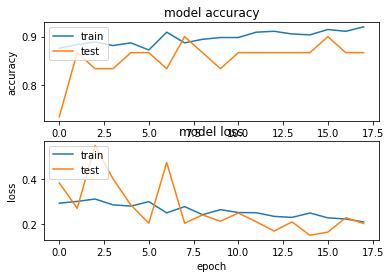

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(1)  

# обобщение истории для точности   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # обобщение истории для потерь    
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

##Загрузка сохранённой модели

In [ ]:
# Восстановим в точности ту же модель, включая веса и оптимизатор
Loading_model = keras.models.load_model("/content/drive/My Drive/Files for colab/CNN for audio/CNN_model_" + str(number_of_interations) + ".h5")
Loading_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 83, 83, 8)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        1056      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       16512     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 128)        0

##Подготовка данныъх

In [ ]:
# Загрузим имена файлов и их соответствующие целевые метки в массив numpy
from sklearn.datasets import load_files
import numpy as np

test_dir = 'Spectrograms/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [ ]:
no_of_classes = len(np.unique(y_test))
print('Количество классов: ', no_of_classes)

Количество классов:  3


In [ ]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
# У нас есть только имена файлов в наборе x. Загрузим изображения и преобразуем их в массив.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Преобразование в массив Numpy
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Размеры тестовой выборки (кол-во изображений, размеры, кол-во каналов): ', x_test.shape)

Размеры тестовой выборки (кол-во изображений, размеры, кол-во каналов):  (30, 84, 84, 3)


In [ ]:
x_test = x_test.astype('float32')/255

##Проверка работоспособности

###16 случайных спектрограмм

Время выполнения операции =  0.3957986831665039  c


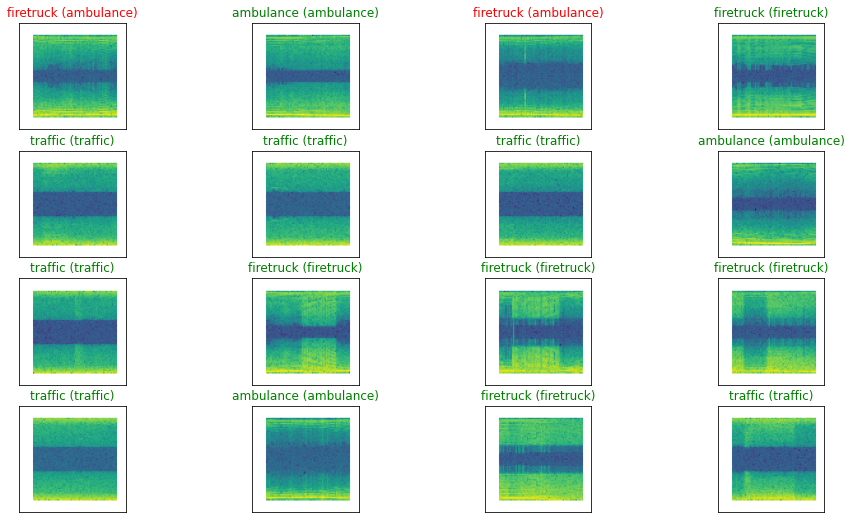

In [ ]:
import matplotlib.pyplot as plt

y_pred = Loading_model.predict(x_test)
start_time = time.time()
# построение случайной выборки тестовых изображений, их предсказанные метки и  истинного значения
fig = plt.figure(figsize = (16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size = 16, replace = False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]), color = ("green" if pred_idx == true_idx else "red"))

print("Время выполнения операции = ", (time.time() - start_time), ' c')

###Проверка отдельного изображения из тестовой выборки с расчётом затраченного времени

Введите номер изображения, для теста из тестовой выборки (от 0 до 59)
5
Время выполнения операции =  0.017295360565185547  c


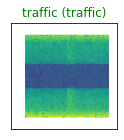

In [ ]:
import matplotlib.pyplot as plt

print('Введите номер изображения, для теста из тестовой выборки (от 0 до 59)')
idx = int(input())

start_time = time.time()
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
ax.imshow(np.squeeze(x_test[idx]))
pred_idx = np.argmax(y_pred[idx])
true_idx = np.argmax(y_test[idx])
ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]), color=("green" if pred_idx == true_idx else "red"))
print("Время выполнения операции = ", (time.time() - start_time), ' c')

###Прогонка всей тестовой выборки

In [ ]:
import matplotlib.pyplot as plt

print('Прогон всех тестовых изображений по порядку')

for k in range(59):

  fig = plt.figure(figsize=(16, 9))
  ax = fig.add_subplot(4, 4, 2, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[k]))
  pred_idx = np.argmax(y_pred[k])
  true_idx = np.argmax(y_test[k])
  ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]), color=("green" if pred_idx == true_idx else "red"))

###Проверка отдельного изображения из тестовой выборки с расчётом затраченного времени без вывода изображения

In [ ]:
print('Введите номер изображения, для теста из тестовой выборки (от 0 до 59)')
idx = int(input())

start_time = time.time()
pred_idx = np.argmax(y_pred[idx])
print('Номер дефекта: ', pred_idx)
print("Время выполнения операции = ", (time.time() - start_time), ' c')
time_for_operation = (time.time() - start_time)
print("Расшифровка: ambulance = 0, firetruck = 1, traffic = 2")

Введите номер изображения, для теста из тестовой выборки (от 0 до 59)
5
Номер дефекта:  2
Время выполнения операции =  0.0010883808135986328  c
Расшифровка: ambulance = 0, firetruck = 1, traffic = 2


#Работа с загруженными аудидорожками

##Загрузим тестовый звук и разделим на отрезки по 3 секунды

In [ ]:
path = '/content/drive/My Drive/Files for colab/CNN for audio/EVS/traffic/sound_600.wav' # Путь к файлу

audio_for_test = AudioSegment.from_wav(path)

for i in range (0, len(audio_for_test)):
  array_of_sounds.append(audio_for_test[i:300 + i])
  i+=300;

In [ ]:
data, samplrate = librosa.load(path)
plt.figure(figsize=(8,5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref = np.max)
plt.axis('off')
librosa.display.specshow(D)
plt.savefig('traffic_spec_600.png', bbox_inches = 'tight', pad_inches = 0)

##Обработка спектрограмм нейросетью

In [ ]:
# Загрузим имена файлов и их соответствующие целевые метки в массив numpy
from sklearn.datasets import load_files
import numpy as np

test_dir_2 = 'Fragments/ForTest'

def load_dataset_2 (path):
    data_2 = load_files(path)
    files_2 = np.array(data_2['filenames'])
    targets_2 = np.array(data_2['target'])
    target_labels_2 = np.array(data_2['target_names'])
    return files_2,targets_2,target_labels_2
    
x_test_2, y_test_2, target_labels_2 = load_dataset_2(test_dir_2)
no_of_classes_2 = len(np.unique(y_test_2))

In [ ]:
# У нас есть только имена файлов в наборе x. Загрузим изображения и преобразуем их в массив.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array_2=[]
    for file in files:
        # Преобразование в массив Numpy
        images_as_array_2.append(img_to_array(load_img(file)))
    return images_as_array_2

x_test_2 = np.array(convert_image_to_array(x_test_2))
x_test_2 = x_test.astype('float32')/255

In [ ]:
import matplotlib.pyplot as plt

y_pred_2 = Loading_model.predict(x_test_2)
start_time = time.time()
massive_of_defects = []

# построение случайной выборки тестовых изображений, их предсказанные метки и  истинного значения
fig = plt.figure(figsize = (16, 9))

for idx_2 in range(number_of_fragments_img):
    pred_idx_2 = np.argmax(y_pred_2[idx_2])
    print('Номер дефекта: '+ str(pred_idx_2) + ' для ' + str(idx_2 + 1) + ' изображения')
    if (pred_idx_2 != 7):
      massive_of_defects.append(pred_idx_2)

print("Время выполнения операции = ", (time.time() - start_time), ' c')
print("Расшифровка: crazing = 1, inclusion = 2, patches = 3, plitted surface = 4, rolled in scale = 5, scratches = 6, clear surface = 7")